In [1]:
import numpy as np
import copy
import scipy.io

In [2]:
mat = scipy.io.loadmat('/Users/nikitakocherin/Downloads/BlackBoxData.mat')
x = mat['x'][0]
y = mat['y'][0]
x = (x / np.linalg.norm(x))
y = (y / np.linalg.norm(y))

In [3]:
def generate_first_monom_dict(I, x):
    def generate_first_mon(bias, x):
        if bias == 0:
                return x
        base = np.zeros(len(x), dtype='complex')
        if bias < 0:
            for i in range(-bias, len(x)):
                base[i] = x[i + bias]
        elif bias > 0:
            for i in range(len(x) - bias):
                base[i] = x[i + bias]
        return base
    result = []
    for i in range(-I, I + 1):
        result.append(generate_first_mon(i, x))
    return result

In [4]:
def generate_monom_dict(I, D, x):
    def generate_mon(bias, degree, x):
        if bias == 0:
            return np.power(np.absolute(x), degree)
        base = np.zeros(len(x), dtype='complex')
        if bias < 0:
            for i in range(-bias, len(x)):
                base[i] = x[i + bias]
        elif bias > 0:
            for i in range(len(x) - bias):
                base[i] = x[i + bias]
        return np.power(np.absolute(base), degree)
    result = []
    for i in range(-I, I + 1):
        for j in range(D + 1):
            result.append(generate_mon(i, j, x))
    return result

In [5]:
def multiplicate(count, monom_dict):
    if count == 1:
        for i in monom_dict:
            yield i
    elif count == 2:
        for i in monom_dict:
            for j in monom_dict:
                yield i * j
    elif count == 3:
        for i in monom_dict:
            for j in monom_dict:
                for k in monom_dict:
                    yield i * j * k

In [6]:
def generate_real_dict_generator_subset(I, D, M, x, num_sub, divider):
    monom_dict = generate_monom_dict(I, D, x)
    first_mon = generate_first_monom_dict(I, x)
    counter = 0
    for i in first_mon:
        to_mult = multiplicate(M, monom_dict)
        for j in to_mult:
            if counter % divider == num_sub:
                k = i * j
                k = k / np.linalg.norm(k)
                counter += 1
                yield k    
            else:
                counter += 1

In [96]:
def approximate_without_saving(x, y, I, D, M, divider, flag=True):
    u_n = y
    iter = 0
    v_arr = []
    vector_norm = []
    norm_u_n_prev = 0
    u_n_prev = copy.deepcopy(u_n)
    while(np.linalg.norm(u_n) > 0.01 and iter < 1000):
        vector_norm.append(np.linalg.norm(u_n))
        if abs(np.linalg.norm(u_n) - norm_u_n_prev) < 0.0000001:
            break
        norm_u_n_prev = np.linalg.norm(u_n)
        for j in range(divider):
            v_n1 = None
            val = 0
            my_dict = generate_real_dict_generator_subset(I, D, M, x, j, divider)
            for i in my_dict:
                s = np.absolute(np.vdot(u_n, i))
                nor = abs(s)
                if nor > val:
                    v_n1 = i
                    val = nor
            h_n1_wave = copy.deepcopy(v_n1)
            if flag:
                for i in v_arr:
                    #print("iter", iter)
                    #print(np.vdot(v_n1, i), np.vdot(i, v_n1))
                    h_n1_wave = h_n1_wave - np.vdot(i, v_n1) * i
            h_n1 = h_n1_wave / np.linalg.norm(h_n1_wave)
            v_arr.append(h_n1)
            u_n = u_n - np.vdot(h_n1, u_n) * h_n1 #поменял
        iter += 1
        if iter % 2 == 0:
            print(np.linalg.norm(u_n))
    print(np.linalg.norm(u_n), "iter:", iter)
    return vector_norm

In [98]:
%%time
v_norm_10 = approximate_without_saving(x, y, 2, 2, 2, 10)

3.5743029692921575
3.5743029692915935 iter: 3
CPU times: user 47.3 ms, sys: 9.88 ms, total: 57.2 ms
Wall time: 55.9 ms


In [11]:
%%time
v_norm_9 = approximate_without_saving(x, y, 2, 2, 2, 9)

0.032973358571926625
0.031922386921551464
0.03192071421634754 iter: 43
CPU times: user 5min 27s, sys: 7.9 s, total: 5min 35s
Wall time: 5min 36s


In [12]:
%%time
v_norm_8 = approximate_without_saving(x, y, 2, 2, 2, 8)

0.03406282869962657
0.030496766932683526
0.03049673364642236 iter: 41
CPU times: user 4min 39s, sys: 6.58 s, total: 4min 45s
Wall time: 4min 45s


In [13]:
%%time
v_norm_7 = approximate_without_saving(x, y, 2, 2, 2, 7)

0.035555142869717324
0.030552676670419537
0.030498103192075465 iter: 46
CPU times: user 4min 43s, sys: 5.15 s, total: 4min 48s
Wall time: 4min 48s


In [14]:
%%time
v_norm_6 = approximate_without_saving(x, y, 2, 2, 2, 6)

0.036400334041419895
0.033521857598242395
0.03344906747832819
0.03344408829828711 iter: 74
CPU times: user 7min 4s, sys: 6.68 s, total: 7min 11s
Wall time: 7min 11s


In [15]:
%%time
v_norm_5 = approximate_without_saving(x, y, 2, 2, 2, 5)

0.04630431256518273
0.03180308176856621
0.03049750728257103
0.030496354671552973 iter: 63
CPU times: user 5min 8s, sys: 5.99 s, total: 5min 14s
Wall time: 5min 14s


In [16]:
%%time
v_norm_4 = approximate_without_saving(x, y, 2, 2, 2, 4)

0.04723265381498327
0.03326077535688199
0.030672067782841723
0.030496837794756877 iter: 79
CPU times: user 5min 38s, sys: 8.45 s, total: 5min 46s
Wall time: 5min 46s


In [17]:
%%time
v_norm_3 = approximate_without_saving(x, y, 2, 2, 2, 3)

0.04999109689465299
0.0352646500909335
0.03335884098026685
0.03322514672667797
0.03322041373065953
0.0332199655641926 iter: 104
CPU times: user 6min 20s, sys: 10.5 s, total: 6min 31s
Wall time: 6min 31s


In [18]:
%%time
v_norm_2 = approximate_without_saving(x, y, 2, 2, 2, 2)

0.05451432083622251
0.047015227732917525
0.03512062972672772
0.03316204702679093
0.031148132074982907
0.030688898727957502
0.030551531403765344
0.03050119025065478 iter: 146
CPU times: user 7min 23s, sys: 11.2 s, total: 7min 34s
Wall time: 7min 34s


In [19]:
%%time
v_norm_1 = approximate_without_saving(x, y, 2, 2, 2, 1)

0.06538489239939564
0.05583293902304306
0.05003677189411938
0.04739865688126172
0.04217663780605666
0.03645991573276225
0.03470083535171343
0.03308249723319386
0.03222761634072152
0.03144936901175746
0.031121265956730707
0.030736246638154663
0.03059678039165769
0.030519390722423607
0.030508246876823138 iter: 286
CPU times: user 11min 28s, sys: 21.4 s, total: 11min 49s
Wall time: 11min 49s


теперь проверим 232

In [20]:
%%time
u_norm_1 = approximate_without_saving(x, y, 2, 3, 2, 1)

0.06340801957967318
0.05294115954557857
0.04895243750411572
0.04581409329763775
0.041204096505075456
0.0390550771454026
0.03721061801891924
0.03621513663597361
0.033117436806105245
0.03154886503271468
0.031218075296909727
0.03101640474307857
0.030651283158647062
0.030149204919643475
0.029570380697486586
0.02938245527404189
0.02919347300134791
0.028727305349862457
0.028482854299862866
0.026672561688625716
0.026248335888725573
0.0260480677546165
0.025892810877166404
0.02545275731115783
0.02538530093791104
0.025368534633881692 iter: 504
CPU times: user 33min 53s, sys: 45.9 s, total: 34min 39s
Wall time: 34min 39s


In [21]:
%%time
u_norm_2 = approximate_without_saving(x, y, 2, 3, 2, 2)

0.05477046782068738
0.04585733333292601
0.0375714515501603
0.03449967978176309
0.03345518570864272
0.030814127733479094
0.02949603721920709
0.028888392947064252
0.02765897220819871
0.026160232901978414
0.025796874636584203
0.025426958073296962
0.025276400945566116
0.025216147177577287
0.025201164152449676
0.025201164152449676 iter: 300
CPU times: user 24min 49s, sys: 32.9 s, total: 25min 22s
Wall time: 25min 22s


In [22]:
%%time
u_norm_3 = approximate_without_saving(x, y, 2, 3, 2, 3)

0.050583964452151194
0.03818786285598502
0.03301237437960277
0.0304322551426849
0.02922274920993202
0.028351962209084956
0.02623951516642002
0.02547628134450232
0.025245496917992785
0.025201105819590022
0.025200871714567568 iter: 202
CPU times: user 19min 46s, sys: 19.9 s, total: 20min 5s
Wall time: 20min 5s


In [23]:
%%time
u_norm_4 = approximate_without_saving(x, y, 2, 3, 2, 4)

0.04091469963332121
0.033244107186598974
0.030710085832462732
0.029299515772961224
0.029091011838626443
0.02908208989267756 iter: 115
CPU times: user 12min 40s, sys: 13.2 s, total: 12min 53s
Wall time: 12min 53s


In [24]:
%%time
u_norm_5 = approximate_without_saving(x, y, 2, 3, 2, 5)

0.04196142732619696
0.03142788495565262
0.029662926254672265
0.026551171582206406
0.02533283244225591
0.025201097066896615
0.02520089180249685 iter: 122
CPU times: user 15min 37s, sys: 11.9 s, total: 15min 49s
Wall time: 15min 49s


In [25]:
%%time
u_norm_6 = approximate_without_saving(x, y, 2, 3, 2, 6)

0.03681305823138892
0.030685687932389048
0.02838548126243456
0.025394743971576185
0.02520143270341411
0.02520087228307962 iter: 102
CPU times: user 14min 36s, sys: 16.3 s, total: 14min 52s
Wall time: 14min 53s


In [26]:
%%time
u_norm_7 = approximate_without_saving(x, y, 2, 3, 2, 7)

0.03665360721281596
0.029549745612625453
0.026362963391365197
0.025214015748717962
0.025200871727075438 iter: 88
CPU times: user 13min 44s, sys: 12.2 s, total: 13min 56s
Wall time: 13min 56s


In [27]:
%%time
u_norm_8 = approximate_without_saving(x, y, 2, 3, 2, 8)

0.03391716859442852
0.029093566144202134
0.02877658701456059
0.028774754099884444 iter: 69
CPU times: user 11min 47s, sys: 8.99 s, total: 11min 56s
Wall time: 11min 56s


In [28]:
%%time
u_norm_9 = approximate_without_saving(x, y, 2, 3, 2, 9)

0.03390070910370997
0.027283848994540647
0.025245789691537596
0.025200898663341006 iter: 68
CPU times: user 12min 40s, sys: 12.2 s, total: 12min 52s
Wall time: 12min 52s


In [29]:
%%time
u_norm_10 = approximate_without_saving(x, y, 2, 3, 2, 10)

0.03294134324475522
0.02656569253017662
0.02520206056489619
0.02520116123914107 iter: 62
CPU times: user 12min 26s, sys: 10.7 s, total: 12min 37s
Wall time: 12min 37s


In [30]:
%%time
u_norm_11 = approximate_without_saving(x, y, 2, 3, 2, 11)

0.03124165194221009
0.025882454772714707
0.02520093655356115 iter: 56
CPU times: user 12min 4s, sys: 10.7 s, total: 12min 15s
Wall time: 12min 15s


In [31]:
%%time
u_norm_12 = approximate_without_saving(x, y, 2, 3, 2, 12)

0.030437564487109808
0.027093135456476344
0.027057815128432628 iter: 57
CPU times: user 13min 26s, sys: 8.88 s, total: 13min 34s
Wall time: 13min 35s


снова 222

In [32]:
%%time
v_norm_15 = approximate_without_saving(x, y, 2, 2, 2, 15)

0.03303774774660286
0.03296737804808049
0.0329627196208126
0.03296200493089325 iter: 65
CPU times: user 15min 10s, sys: 29.2 s, total: 15min 39s
Wall time: 15min 44s


In [33]:
%%time
v_norm_20 = approximate_without_saving(x, y, 2, 2, 2, 20)

0.03051797065270238
0.03051797065270238 iter: 20
CPU times: user 4min 53s, sys: 2.88 s, total: 4min 56s
Wall time: 4min 56s


In [34]:
%%time
v_norm_25 = approximate_without_saving(x, y, 2, 2, 2, 25)

0.030502605763100467 iter: 15
CPU times: user 4min 28s, sys: 3.3 s, total: 4min 31s
Wall time: 4min 31s


In [35]:
%%time
v_norm_30 = approximate_without_saving(x, y, 2, 2, 2, 35)

0.030580317012868598 iter: 13
CPU times: user 5min 26s, sys: 3.51 s, total: 5min 30s
Wall time: 5min 30s


In [36]:
%%time
v_norm_35 = approximate_without_saving(x, y, 2, 2, 2, 35)

0.030580317012868598 iter: 13
CPU times: user 5min 25s, sys: 3.62 s, total: 5min 29s
Wall time: 5min 29s


In [37]:
%%time
v_norm_40 = approximate_without_saving(x, y, 2, 2, 2, 40)

0.030518272621512726 iter: 11
CPU times: user 5min 12s, sys: 2.32 s, total: 5min 14s
Wall time: 5min 14s


In [38]:
%%time
v_norm_45 = approximate_without_saving(x, y, 2, 2, 2, 45)

0.048979858982268996
0.048979556811380665 iter: 23
CPU times: user 14min 57s, sys: 17.7 s, total: 15min 14s
Wall time: 15min 17s


In [39]:
%%time
v_norm_50 = approximate_without_saving(x, y, 2, 2, 2, 50)

0.030579067713200053 iter: 11
CPU times: user 6min 37s, sys: 2.46 s, total: 6min 39s
Wall time: 6min 39s


In [43]:
%%time
v_norm_46 = approximate_without_saving(x, y, 2, 2, 2, 46)

0.030516257429164136 iter: 9
CPU times: user 4min 44s, sys: 2.06 s, total: 4min 46s
Wall time: 4min 46s


In [44]:
%%time
v_norm_70 = approximate_without_saving(x, y, 2, 2, 2, 70)

0.0305408415264763 iter: 7
CPU times: user 5min 41s, sys: 4.48 s, total: 5min 45s
Wall time: 5min 45s


In [58]:
%%time
v_norm_90 = approximate_without_saving(x, y, 2, 2, 2, 90)

0.047164945337547594
0.04716439560326817 iter: 25
CPU times: user 48min 31s, sys: 42min 54s, total: 1h 31min 25s
Wall time: 4h 36min 49s


In [53]:
%%time
v_norm_110 = approximate_without_saving(x, y, 2, 2, 2, 110)##########redo

0.03082540933033013 iter: 13
CPU times: user 23min 32s, sys: 3min 21s, total: 26min 54s
Wall time: 34min 51s


In [56]:
%%time
v_norm_130 = approximate_without_saving(x, y, 2, 2, 2, 130)

0.030719150422633793 iter: 11
CPU times: user 23min 13s, sys: 3min 56s, total: 27min 9s
Wall time: 35min 5s


In [57]:
%%time
v_norm_150 = approximate_without_saving(x, y, 2, 2, 2, 150)

0.04835784807335127 iter: 14
CPU times: user 44min 13s, sys: 36min 7s, total: 1h 20min 20s
Wall time: 4h 1min 7s


232

In [59]:
%%time
u_norm_15 = approximate_without_saving(x, y, 2, 3, 2, 15)

0.02946601129389253
0.025203837822797913
0.02520290379414541 iter: 43
CPU times: user 11min 53s, sys: 8.69 s, total: 12min 2s
Wall time: 12min 2s


In [60]:
%%time
u_norm_20 = approximate_without_saving(x, y, 2, 3, 2, 20)

0.02901558599757004
0.02898064007944722
0.028980549968284124 iter: 41
CPU times: user 15min 6s, sys: 9.65 s, total: 15min 16s
Wall time: 15min 16s


In [61]:
%%time
u_norm_30 = approximate_without_saving(x, y, 2, 3, 2, 30)

0.02520601490632975
0.02520580083678037 iter: 22
CPU times: user 11min 14s, sys: 5.16 s, total: 11min 19s
Wall time: 11min 19s


In [62]:
%%time
u_norm_40 = approximate_without_saving(x, y, 2, 3, 2, 40)

0.03008427298883964
0.030083332131121295 iter: 27
CPU times: user 20min 11s, sys: 1min 1s, total: 21min 12s
Wall time: 21min 27s


In [91]:
%%time
u_norm_50 = approximate_without_saving(x, y, 2, 3, 2, 50)

3.573714699643886
3.573714607117253 iter: 3
CPU times: user 175 ms, sys: 3.99 ms, total: 179 ms
Wall time: 177 ms


In [64]:
%%time
u_norm_60 = approximate_without_saving(x, y, 2, 3, 2, 60)

0.03003019261887322 iter: 19
CPU times: user 20min 37s, sys: 27.5 s, total: 21min 5s
Wall time: 21min 12s


In [65]:
%%time
u_norm_70 = approximate_without_saving(x, y, 2, 3, 2, 70)

0.025273434095779396 iter: 12
CPU times: user 14min 8s, sys: 7.48 s, total: 14min 16s
Wall time: 14min 16s


In [75]:
%%time
u_norm_90 = approximate_without_saving(x, y, 2, 3, 2, 90)

0.02522446966753775 iter: 11
CPU times: user 16min 50s, sys: 4.58 s, total: 16min 55s
Wall time: 16min 55s


In [78]:
%%time
u_norm_110 = approximate_without_saving(x, y, 2, 3, 2, 110)

0.03136879840079865
0.025886892043655633
0.025527822050856384
0.025525024100872488
0.02552430477841664
0.025523976136340908
0.025523882825292426 iter: 13
CPU times: user 28min 37s, sys: 7min 6s, total: 35min 43s
Wall time: 49min 28s


In [79]:
%%time
u_norm_130 = approximate_without_saving(x, y, 2, 3, 2, 130)

0.030075795920672735
0.025382013335940833
0.025328951360199227
0.025328268914392934
0.02532805953007113
0.02532805953007113 iter: 10
CPU times: user 24min 27s, sys: 1min 4s, total: 25min 32s
Wall time: 25min 47s


In [80]:
%%time
u_norm_150 = approximate_without_saving(x, y, 2, 3, 2, 150)

0.02943740259490859
0.02553123248931839
0.025528758501553138
0.025528422403289425
0.02552834337344036 iter: 9
CPU times: user 25min 35s, sys: 1min 40s, total: 27min 15s
Wall time: 28min 13s


In [86]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 60, 70, 90, 110, 130, 150]
y = [34, 25, 20, 13, 16, 15, 14, 12, 13, 12.5, 12.25, 13.5, 12, 15, 11, 21.5, 11.5, 21, 14, 17, 28, 25, 28]

No handles with labels found to put in legend.


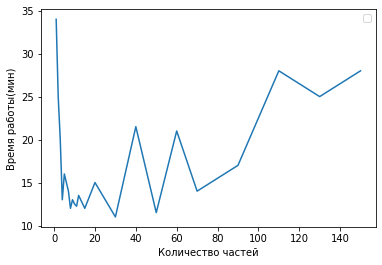

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(x, y)
ax.set_xlabel('Количество частей')
ax.set_ylabel('Время работы(мин)')
ax.legend()